# **Proyecto Detección Accidentes de Tráfico**

Cargamos las librerias necesarias

In [1]:
! pip install --upgrade category_encoders

You should consider upgrading via the '/Users/john_mcclaine/mbit/mbit_venv/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import classification_report,auc
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, \
precision_score, recall_score, roc_auc_score, confusion_matrix, roc_curve, make_scorer
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.tree import DecisionTreeClassifier

Cargamos el dataset de accidentes de tráfico

Resumen datos

In [3]:
data_folder = '../Files/'

In [4]:
#Dataset Inicial
#df = pd.read_csv('https://drive.google.com/uc?id=1S2KAtQxI_kyLIoeLl43NZRvX_k93Qhwo', sep=";")

#Dataset 1

#df = pd.read_csv('https://drive.google.com/uc?id=1ZWNM8ita8NJSDKyiHdObWOq8sS3aBZmm', sep=";")

#Dataset 2

df = pd.read_csv(f'{data_folder}2023_Accidentalidad_c_g_s_d_clean.csv', sep=";")

#df = pd.read_csv('https://drive.google.com/uc?id=1ZWNM8ita8NJSDKyiHdObWOq8sS3aBZmm', sep=";")



#Dataset 3

#df = pd.read_csv('https://drive.google.com/uc?id=1vREvAEbNp0RoDnKkZIu-Vq5zMTW6rzjH', sep=";")

In [5]:
df.head()

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,...,coordinates_speed_api,road_name_speed_api,speedlimit_kph_speed_api,dia_semana,hora_accidente,int_real,ocupacion,vmed,high_speed_point,hora_rango
0,2023S000001,2023-01-01,01:15:00,"AVDA. ALFONSO XIII, 33",33,5,Chamartín,Alcance,Despejado,Todo terreno,...,"{'latitude': 40.45191182917747, 'longitude': -...",Avenida de Alfonso XIII,50,Sunday,1:15:00,135.100769,5.347692,73.0,0,1
1,2023S000001,2023-01-01,01:15:00,"AVDA. ALFONSO XIII, 33",33,5,Chamartín,Alcance,Despejado,Todo terreno,...,"{'latitude': 40.45191182917747, 'longitude': -...",Avenida de Alfonso XIII,50,Sunday,1:15:00,135.100769,5.347692,73.0,0,1
2,2023S000001,2023-01-01,01:15:00,"AVDA. ALFONSO XIII, 33",33,5,Chamartín,Alcance,Despejado,Todo terreno,...,"{'latitude': 40.45191182917747, 'longitude': -...",Avenida de Alfonso XIII,50,Sunday,1:15:00,135.100769,5.347692,73.0,0,1
3,2023S000001,2023-01-01,01:15:00,"AVDA. ALFONSO XIII, 33",33,5,Chamartín,Alcance,Despejado,Todo terreno,...,"{'latitude': 40.45191182917747, 'longitude': -...",Avenida de Alfonso XIII,50,Sunday,1:15:00,135.100769,5.347692,73.0,0,1
4,2023S000001,2023-01-01,01:15:00,"AVDA. ALFONSO XIII, 33",33,5,Chamartín,Alcance,Despejado,Todo terreno,...,"{'latitude': 40.45191182917747, 'longitude': -...",Avenida de Alfonso XIII,50,Sunday,1:15:00,135.100769,5.347692,73.0,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19349 entries, 0 to 19348
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   num_expediente            19349 non-null  object 
 1   fecha                     19349 non-null  object 
 2   hora                      19349 non-null  object 
 3   localizacion              19349 non-null  object 
 4   numero                    19349 non-null  object 
 5   cod_distrito              19349 non-null  int64  
 6   distrito                  19349 non-null  object 
 7   tipo_accidente            19349 non-null  object 
 8   estado_meteorológico      19349 non-null  object 
 9   tipo_vehiculo             19349 non-null  object 
 10  tipo_persona              19349 non-null  object 
 11  rango_edad                19349 non-null  object 
 12  sexo                      19349 non-null  object 
 13  cod_lesividad             19349 non-null  float64
 14  lesivi

Columnas del dataset

In [7]:
df.columns

Index(['num_expediente', 'fecha', 'hora', 'localizacion', 'numero',
       'cod_distrito', 'distrito', 'tipo_accidente', 'estado_meteorológico',
       'tipo_vehiculo', 'tipo_persona', 'rango_edad', 'sexo', 'cod_lesividad',
       'lesividad', 'coordenada_x_utm', 'coordenada_y_utm', 'positiva_alcohol',
       'positiva_droga', 'longitude', 'latitude', 'geohash', 'road_info',
       'category', 'type', 'house_number', 'postcode', 'quarter', 'road',
       'formatted', 'latitude_api', 'longitude_api', 'coordinates_speed_api',
       'road_name_speed_api', 'speedlimit_kph_speed_api', 'dia_semana',
       'hora_accidente', 'int_real', 'ocupacion', 'vmed', 'high_speed_point',
       'hora_rango'],
      dtype='object')

**Analisis Dataset**

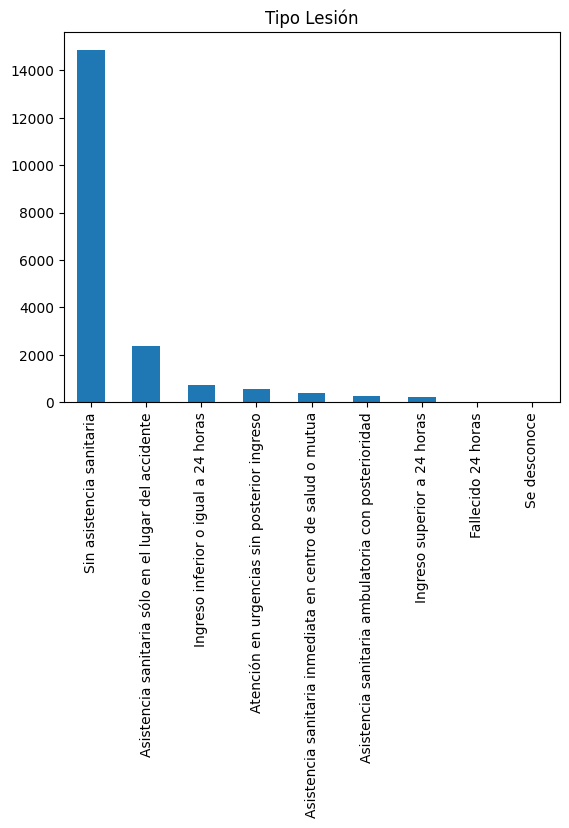

In [8]:
plot = df['lesividad'].value_counts().plot(kind='bar',title='Tipo Lesión')

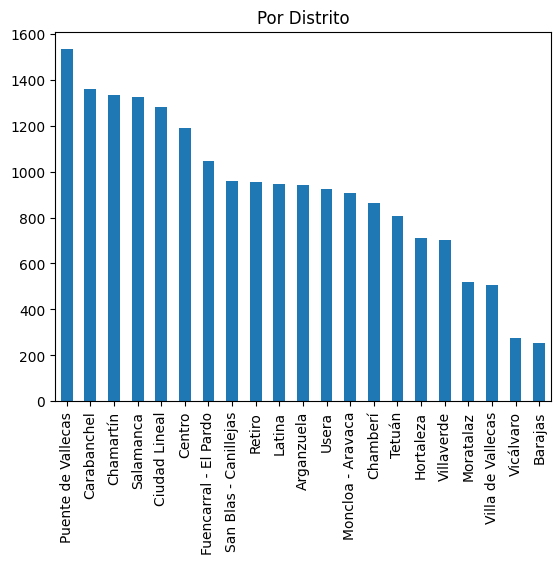

In [9]:
plot = df['distrito'].value_counts().plot(kind='bar',title='Por Distrito')

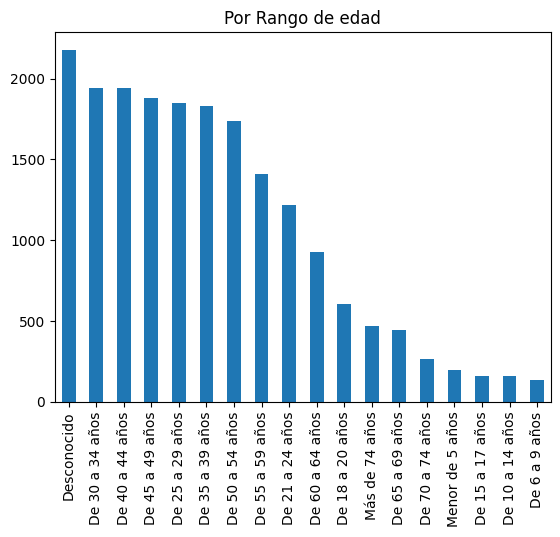

In [10]:
plot = df['rango_edad'].value_counts().plot(kind='bar',title='Por Rango de edad')

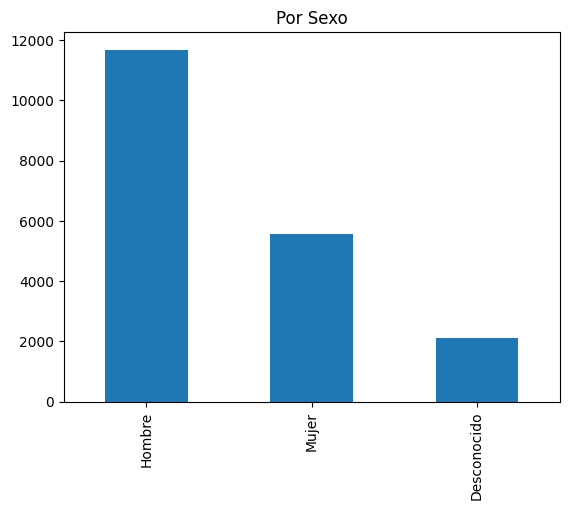

In [11]:
plot = df['sexo'].value_counts().plot(kind='bar',title='Por Sexo')

In [12]:
# Comprobamos las dimensiones del dataset
df.shape

(19349, 42)

In [13]:
#Vemos los tipos de datos de las columnas
df.dtypes

num_expediente               object
fecha                        object
hora                         object
localizacion                 object
numero                       object
cod_distrito                  int64
distrito                     object
tipo_accidente               object
estado_meteorológico         object
tipo_vehiculo                object
tipo_persona                 object
rango_edad                   object
sexo                         object
cod_lesividad               float64
lesividad                    object
coordenada_x_utm            float64
coordenada_y_utm            float64
positiva_alcohol             object
positiva_droga                int64
longitude                   float64
latitude                    float64
geohash                      object
road_info                    object
category                     object
type                         object
house_number                 object
postcode                    float64
quarter                     

In [14]:
# Vemos la estadística de la variables numéricas
df.describe()

,cod_distrito,cod_lesividad,coordenada_x_utm,coordenada_y_utm,positiva_droga,longitude,latitude,postcode,latitude_api,longitude_api,speedlimit_kph_speed_api,int_real,ocupacion,vmed,high_speed_point,hora_rango
count,19349.000000,19349.000000,19349.000000,1.934900e+04,19349.000000,19349.000000,19349.000000,19328.000000,19349.000000,19349.000000,19349.000000,19349.000000,19349.000000,19349.000000,19349.000000,19349.000000
mean,9.795958,11.933485,442054.287106,4.474638e+06,0.004083,-3.683042,40.420351,28031.542632,40.420357,-3.683043,43.699416,125.094971,7.484347,50.149381,0.093700,13.921340
std,5.617597,3.966180,3447.673650,3.978426e+03,0.063769,0.040578,0.035880,246.999845,0.035886,0.040577,16.211652,59.181876,3.491185,28.368740,0.291418,5.730601
min,1.000000,1.000000,429081.342000,4.463661e+06,0.000000,-3.836651,40.321411,20824.000000,40.320694,-3.836675,10.000000,3.902597,0.114286,0.000000,0.000000,0.000000
25%,5.000000,14.000000,439929.401000,4.471575e+06,0.000000,-3.708093,40.392750,28013.000000,40.392790,-3.708100,30.000000,82.919786,4.972222,46.230000,0.000000,10.000000
50%,10.000000,14.000000,441684.701000,4.474691e+06,0.000000,-3.687449,40.420758,28026.000000,40.420854,-3.687480,50.000000,122.328877,7.756944,61.440000,0.000000,15.000000
75%,14.000000,14.000000,443979.477000,4.477299e+06,0.000000,-3.660492,40.444637,28039.000000,40.444741,-3.660510,50.000000,166.453728,9.812317,70.560000,0.000000,18.000000
max,21.000000,77.000000,454434.352000,4.489373e+06,1.000000,-3.537327,40.553107,29039.000000,40.554050,-3.537853,120.000000,478.743056,21.620690,96.500000,1.000000,23.000000


In [15]:
# Vemos la estadística de las variables categóricas
df.describe(include = object)

,num_expediente,fecha,hora,localizacion,numero,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,...,category,type,house_number,quarter,road,formatted,coordinates_speed_api,road_name_speed_api,dia_semana,hora_accidente
count,19349,19349,19349,19349,19349,19349,19349,19349,19349,19349,...,19349,19349,6193,18092,19349,19349,19349,18327,19349,19349
unique,8159,151,96,7271,1005,21,13,6,33,3,...,14,55,358,120,2340,5572,8149,2281,7,939
top,2023S019009,2023-03-02,18:00:00,"AUTOV. A-2, +00500E",1,Puente de Vallecas,Colisión fronto-lateral,Despejado,Turismo,Conductor,...,government,administrative,2,Entrevías,Avenida de la Paz,"Paseo de la Castellana, 28046 Madrid, Spain","{'latitude': 40.38616573144755, 'longitude': -...",M-30,Friday,18:00:00
freq,23,207,372,39,1673,1534,4726,17432,13550,15630,...,14484,14475,217,415,525,182,23,681,3123,198


In [16]:
# Verificamos datos faltantes por columnas
df.isnull().sum()

num_expediente                  0
fecha                           0
hora                            0
localizacion                    0
numero                          0
cod_distrito                    0
distrito                        0
tipo_accidente                  0
estado_meteorológico            0
tipo_vehiculo                   0
tipo_persona                    0
rango_edad                      0
sexo                            0
cod_lesividad                   0
lesividad                       0
coordenada_x_utm                0
coordenada_y_utm                0
positiva_alcohol                0
positiva_droga                  0
longitude                       0
latitude                        0
geohash                         0
road_info                       0
category                        0
type                            0
house_number                13156
postcode                       21
quarter                      1257
road                            0
formatted     

In [17]:
# Sumamos los datos faltantes
df.isna().sum().sum()

15456

In [18]:
#Vemos el porcentaje de datos faltantes
def percentage_missing_data(df):
    missing_data_volume = df.isna().sum().sum() / np.product(df.shape) * 100
    return f'El volumen de los datos faltan es de: {round(missing_data_volume, 2)}%'

In [19]:
percentage_missing_data(df)

'El volumen de los datos faltan es de: 1.9%'

In [20]:
#podemos ver la cantidad de datos nulos por columnas en un gráfico

def Accidentes_nan(df, n):
    Accidentes_nan = (

    df
    .isna() # Devulve true o false por cada valor nulo.
    .sum() # Sumamos cada valor nulo de cada fila de cada columns.
    .to_frame() # Pasamos de tener un conjunto de datos de tipo serie a un dataframe.
    .reset_index() # Hacemos un reset index.
    .rename(columns = {'index':'columns', 0:'freq'}) # Renombramos la columna.

    )

    Accidentes_nan['%'] = round(Accidentes_nan['freq'] / len(df)*100, n) # Creamos la columna % para ver el procentaje de valores nulos por columns
    return Accidentes_nan

In [21]:
Accidentes_nan = Accidentes_nan(df, 3)

<Axes: ylabel='columns'>

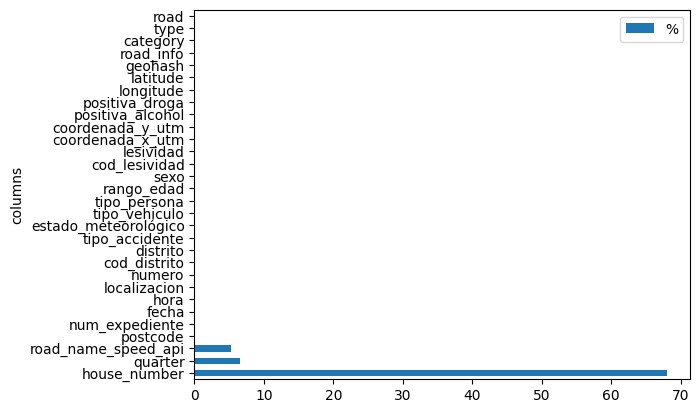

In [22]:
Accidentes_nan.nlargest(30, '%').set_index('columns')[[ '%']].plot.barh()

In [23]:
#eliminamos la columna positiva_droga ya que vemos que casi todos sus datos son faltantes
df_nuevo = df.drop(['positiva_droga'], axis=1)

In [24]:
df_nuevo.head()

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,...,coordinates_speed_api,road_name_speed_api,speedlimit_kph_speed_api,dia_semana,hora_accidente,int_real,ocupacion,vmed,high_speed_point,hora_rango
0,2023S000001,2023-01-01,01:15:00,"AVDA. ALFONSO XIII, 33",33,5,Chamartín,Alcance,Despejado,Todo terreno,...,"{'latitude': 40.45191182917747, 'longitude': -...",Avenida de Alfonso XIII,50,Sunday,1:15:00,135.100769,5.347692,73.0,0,1
1,2023S000001,2023-01-01,01:15:00,"AVDA. ALFONSO XIII, 33",33,5,Chamartín,Alcance,Despejado,Todo terreno,...,"{'latitude': 40.45191182917747, 'longitude': -...",Avenida de Alfonso XIII,50,Sunday,1:15:00,135.100769,5.347692,73.0,0,1
2,2023S000001,2023-01-01,01:15:00,"AVDA. ALFONSO XIII, 33",33,5,Chamartín,Alcance,Despejado,Todo terreno,...,"{'latitude': 40.45191182917747, 'longitude': -...",Avenida de Alfonso XIII,50,Sunday,1:15:00,135.100769,5.347692,73.0,0,1
3,2023S000001,2023-01-01,01:15:00,"AVDA. ALFONSO XIII, 33",33,5,Chamartín,Alcance,Despejado,Todo terreno,...,"{'latitude': 40.45191182917747, 'longitude': -...",Avenida de Alfonso XIII,50,Sunday,1:15:00,135.100769,5.347692,73.0,0,1
4,2023S000001,2023-01-01,01:15:00,"AVDA. ALFONSO XIII, 33",33,5,Chamartín,Alcance,Despejado,Todo terreno,...,"{'latitude': 40.45191182917747, 'longitude': -...",Avenida de Alfonso XIII,50,Sunday,1:15:00,135.100769,5.347692,73.0,0,1


In [25]:
#luego reemplazaremos los valores faltantes de las columnas categoricas por su moda
# Lista de columnas categóricas
categorical_columns = ['tipo_vehiculo',  'estado_meteorológico', 'cod_lesividad', 'lesividad',
                       'coordenada_x_utm', 'coordenada_y_utm', 'positiva_alcohol',
                      'rango_edad', 'sexo','house_number','postcode','road_name_speed_api','coordinates_speed_api','vmed']

In [26]:
def fill_missing_with_mode(df_nuevo, categorical_columns):
    for column in categorical_columns:
        moda = df_nuevo[column].mode()[0]
        df_nuevo[column].fillna(moda, inplace=True)

In [27]:
fill_missing_with_mode(df_nuevo, categorical_columns)

In [28]:
#ahora vemos que nuestro data set quedó sin valores faltantes
df_nuevo.isna().sum()

num_expediente                 0
fecha                          0
hora                           0
localizacion                   0
numero                         0
cod_distrito                   0
distrito                       0
tipo_accidente                 0
estado_meteorológico           0
tipo_vehiculo                  0
tipo_persona                   0
rango_edad                     0
sexo                           0
cod_lesividad                  0
lesividad                      0
coordenada_x_utm               0
coordenada_y_utm               0
positiva_alcohol               0
longitude                      0
latitude                       0
geohash                        0
road_info                      0
category                       0
type                           0
house_number                   0
postcode                       0
quarter                     1257
road                           0
formatted                      0
latitude_api                   0
longitude_

Agrupamos la tipología de la lesividad. Para predecir las categorías Graves y Leves de los accidentes

In [29]:
df_nuevo['flag'] = np.where((df_nuevo['cod_lesividad'] == 3) | (df_nuevo['cod_lesividad'] == 4), 1, 0)

In [30]:
contingency_table = pd.crosstab(df_nuevo['lesividad'], df_nuevo['flag'])
print(contingency_table)

flag                                                    0    1
lesividad                                                     
Asistencia sanitaria ambulatoria con posterioridad    255    0
Asistencia sanitaria inmediata en centro de sal...    395    0
Asistencia sanitaria sólo en el lugar del accid...   2354    0
Atención en urgencias sin posterior ingreso           543    0
Fallecido 24 horas                                      0   12
Ingreso inferior o igual a 24 horas                   706    0
Ingreso superior a 24 horas                             0  224
Se desconoce                                            1    0
Sin asistencia sanitaria                            14859    0


In [31]:
contingency_table = pd.crosstab(df_nuevo['cod_lesividad'], df_nuevo['flag'])
print(contingency_table)

flag               0    1
cod_lesividad            
1.0              543    0
2.0              706    0
3.0                0  224
4.0                0   12
5.0              255    0
6.0              395    0
7.0             2354    0
14.0           14859    0
77.0               1    0


Creamos un nuevo flag para los casos de lesividad normal o grave

In [32]:
df_nuevo['flag_lesion'] = np.where((df_nuevo['cod_lesividad'] == 1) | (df_nuevo['cod_lesividad'] == 2) | (df_nuevo['cod_lesividad'] == 5)| (df_nuevo['cod_lesividad'] == 6)| (df_nuevo['cod_lesividad'] == 7), 1, 0)

In [33]:
contingency_table = pd.crosstab(df_nuevo['lesividad'], df_nuevo['flag_lesion'])
#print(contingency_table)

Quitamos campos que dan error en el modelo

In [34]:
df_nuevo=df_nuevo.drop(['quarter','lesividad','cod_lesividad'], axis=1)

Revisamos la districución con los nuevos flag creados de Grave y Leve

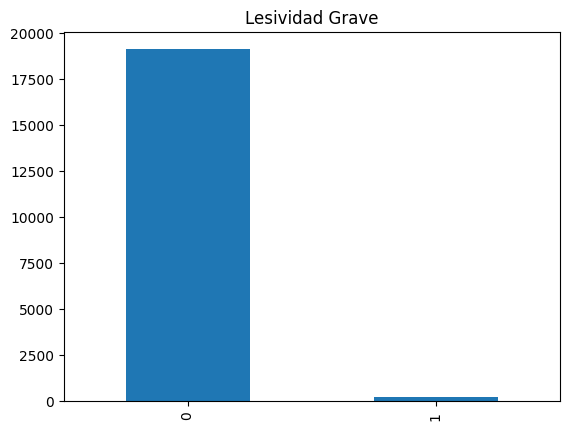

In [35]:
plot = df_nuevo['flag'].value_counts().plot(kind='bar',title='Lesividad Grave')

In [36]:
df_nuevo.flag.value_counts(normalize = True)

0    0.987803
1    0.012197
Name: flag, dtype: float64

0    0.780195
1    0.219805
Name: flag_lesion, dtype: float64

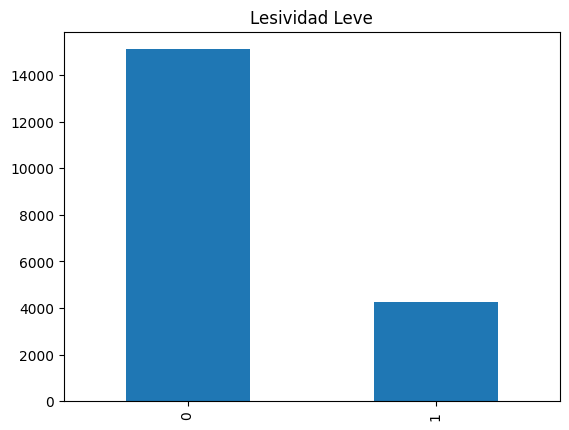

In [37]:
plot = df_nuevo['flag_lesion'].value_counts().plot(kind='bar',title='Lesividad Leve')
df_nuevo.flag_lesion.value_counts(normalize = True)

Analizamos la correlación entre las variables después de la limpieza

/var/folders/hw/skgky54j57nbjgb2lzttrgg40000gn/T/ipykernel_12849/1366570762.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_nuevo.corr(), cmap="bwr", vmin=-1, vmax=1); # Heatmap of correlation between columns of ‘df’.


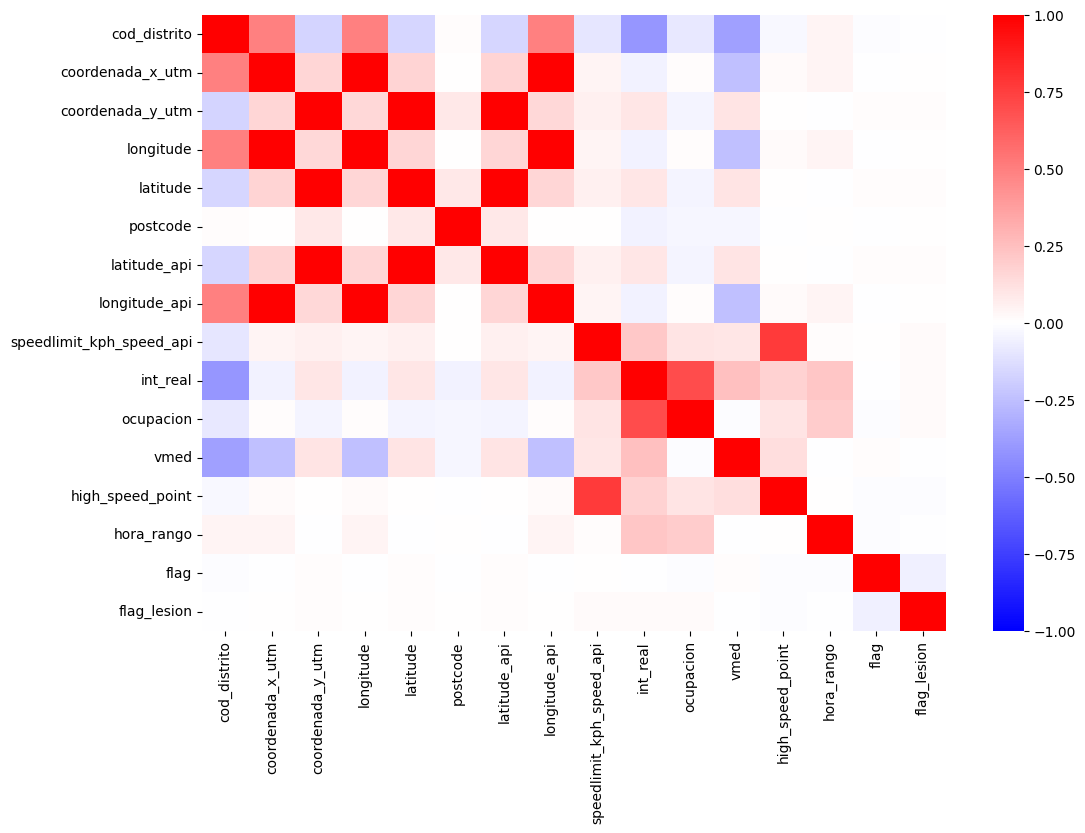

In [38]:
plt.figure(figsize=(12,8))
sns.heatmap(df_nuevo.corr(), cmap="bwr", vmin=-1, vmax=1); # Heatmap of correlation between columns of ‘df’.

#Modelo 1º **Ramdom Forest Clasiffier Lesividad Grave**

Dividimos el modelo quitando el campo de lesividad para predecirlo

In [39]:
X = df_nuevo.drop(['flag','flag_lesion'], axis=1)

y = df_nuevo['flag']

Dividimos en training y test para testear el modelo

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

Vemos los campos del Training para ver los campos a normalizar

In [41]:
X_train.head()

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,...,coordinates_speed_api,road_name_speed_api,speedlimit_kph_speed_api,dia_semana,hora_accidente,int_real,ocupacion,vmed,high_speed_point,hora_rango
11733,2023S013126,2023-04-02,21:45:00,CALL. VILLAAMIL / CALL. PEDRO TEZANO,47,6,Tetuán,Alcance,Despejado,Turismo,...,"{'latitude': 40.459705735929155, 'longitude': ...",Calle de Pedro Tezano,30,Sunday,21:50:00,63.069264,2.233766,0.00,0,21
18365,2023S020832,2023-05-25,08:15:00,CALL. MORATINES / CALL. PEÑUELAS,17,2,Arganzuela,Caída,Despejado,Motocicleta > 125cc,...,"{'latitude': 40.40268635642944, 'longitude': -...",Calle de Moratines,30,Thursday,8:20:00,228.428427,13.000000,59.73,0,8
5987,2023S005437,2023-02-17,14:45:00,"AUTOV. M-30, 11XC00",11XC00,13,Puente de Vallecas,Alcance,Despejado,Turismo,...,"{'latitude': 40.39229756731353, 'longitude': -...",M-30,90,Friday,14:40:00,169.132895,12.389474,60.59,1,14
6036,2023S005476,2023-02-17,20:15:00,"AUTOV. M-30, 11NC50",11NC50,2,Arganzuela,Alcance,Despejado,Turismo,...,"{'latitude': 40.38982072182341, 'longitude': -...",Avenida de la Paz,90,Friday,20:15:00,188.196356,8.360324,58.12,1,20
1149,2023S000716,2023-01-11,10:00:00,CALL. VELAZQUEZ / CALL. JORGE JUAN,20,4,Salamanca,Colisión fronto-lateral,Despejado,Furgoneta,...,"{'latitude': 40.42379120574981, 'longitude': -...",Calle Jorge Juan,30,Wednesday,10:05:00,224.866029,10.794258,76.38,0,10


Normalizamos los campos categoricos

In [42]:
encoder = ce.OrdinalEncoder(cols=['num_expediente',	'fecha',	'hora','distrito','numero','localizacion','coordenada_x_utm',	'coordenada_y_utm', 'formatted', 'coordinates_speed_api', 'road_name_speed_api','geohash',
'type','category','tipo_accidente','house_number','estado_meteorológico', 'tipo_vehiculo', 'tipo_persona', 'rango_edad', 'sexo', 'positiva_alcohol',  'road_info', 'road', 'dia_semana','hora_accidente'])

In [43]:
X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [44]:
X_test.head()

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,...,coordinates_speed_api,road_name_speed_api,speedlimit_kph_speed_api,dia_semana,hora_accidente,int_real,ocupacion,vmed,high_speed_point,hora_rango
257,2822.0,22,20,2668.0,8.0,16,16,5,1,1.0,...,2820.0,1194.0,30,7,218.0,99.703664,7.568966,69.30,0,19
1288,1834.0,138,40,1763.0,445.0,2,2,7,1,3.0,...,1833.0,3.0,90,2,494.0,181.175101,7.388664,61.16,1,14
1994,-1.0,12,47,-1.0,142.0,12,12,4,1,1.0,...,-1.0,-1.0,30,4,279.0,167.991497,11.183673,58.81,0,18
16057,1796.0,75,88,1726.0,55.0,2,2,3,1,1.0,...,1796.0,11.0,50,1,487.0,60.541837,2.491736,65.98,0,2
7030,5847.0,74,50,5330.0,116.0,2,2,5,1,4.0,...,5842.0,1871.0,30,1,179.0,120.688008,5.200820,62.20,0,11


In [45]:
# Identificar las características no numéricas
caracteristicas_no_numericas = df_nuevo.select_dtypes(exclude=['number'])

# Obtener los nombres de las columnas no numéricas
nombres_columnas_no_numericas = caracteristicas_no_numericas.columns.tolist()

# Mostrar los nombres de las columnas no numéricas
print(nombres_columnas_no_numericas)

['num_expediente', 'fecha', 'hora', 'localizacion', 'numero', 'distrito', 'tipo_accidente', 'estado_meteorológico', 'tipo_vehiculo', 'tipo_persona', 'rango_edad', 'sexo', 'positiva_alcohol', 'geohash', 'road_info', 'category', 'type', 'house_number', 'road', 'formatted', 'coordinates_speed_api', 'road_name_speed_api', 'dia_semana', 'hora_accidente']


In [46]:
columnas_con_nan = df_nuevo.columns[df_nuevo.isna().any()].tolist()

# Mostrar las columnas con valores NaN
print("Columnas con NaN:", columnas_con_nan)

Columnas con NaN: []


Iniciamos el Random Forest Classifier

In [47]:
# llamamos al Random Forest

rfc = RandomForestClassifier(n_estimators=100,random_state=0)

# Ajustamos el modelo

rfc.fit(X_train, y_train)

# Predecir los resultados del conjunto de pruebas

y_pred = rfc.predict(X_test)

# Revisamos el  accuracy score

from sklearn.metrics import accuracy_score

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 100 decision-trees : 0.9879


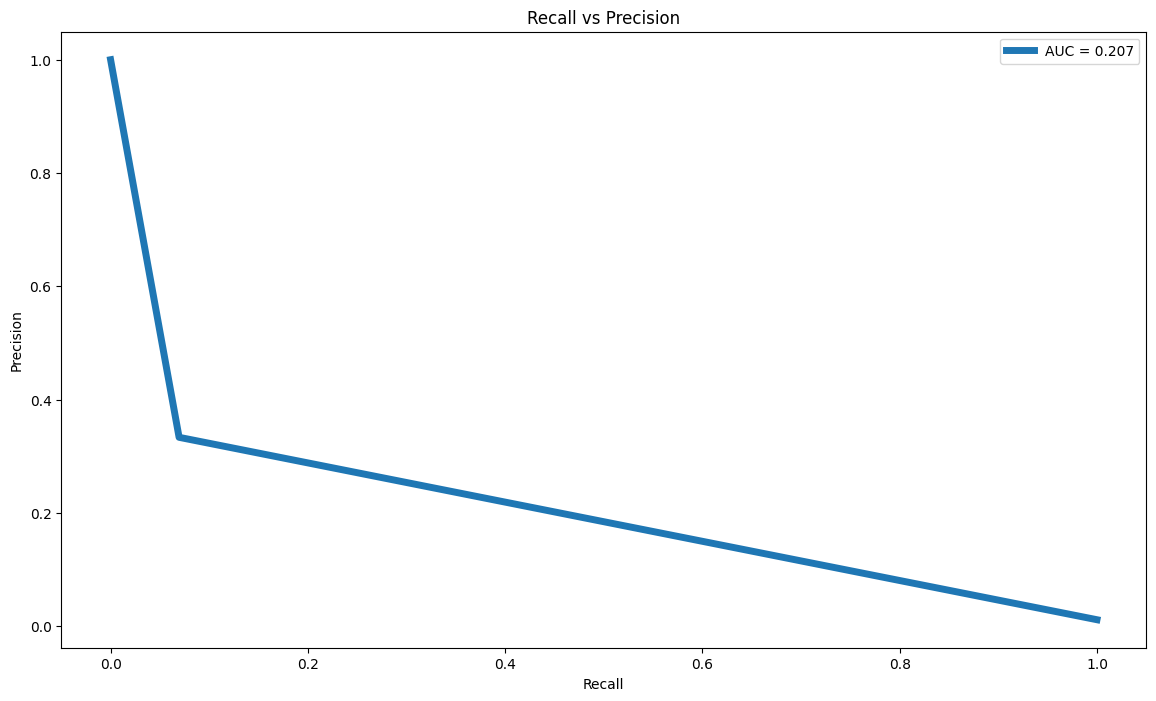

Accuracy score of LOF is:  0.9879423739430003
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6314
           1       0.33      0.07      0.11        72

    accuracy                           0.99      6386
   macro avg       0.66      0.53      0.55      6386
weighted avg       0.98      0.99      0.98      6386

[[6304   10]
 [  67    5]]


<Axes: >

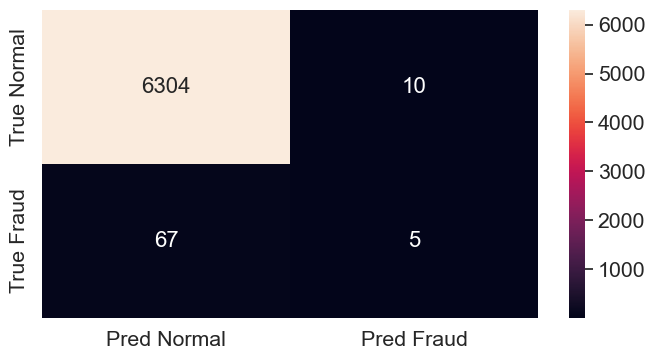

In [48]:
#Creamos etiquetas de clase basadas en la función de decisión
osvm_y_pred_class=y_pred.copy()
osvm_y_pred_class[y_pred<0]=1
osvm_y_pred_class[y_pred>=0]=0


precision_rt, recall_rt, threshold_rt = precision_recall_curve(y_test, y_pred)

pr_auc = auc(recall_rt, precision_rt,)

plt.figure(figsize=(14, 8))
plt.plot(recall_rt, precision_rt, linewidth=5, label='AUC = %0.3f'% pr_auc)
#plt.plot(recall_rt, threshold_rt, linewidth=5, label='Threshold')
plt.legend(loc='upper right')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

print("Accuracy score of LOF is: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

roc_auc_score(y_test, y_pred)

f1_score(y_test,y_pred)

lof_cm=confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(lof_cm,
                  ['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])
plt.figure(figsize = (8,4))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size



Encuentrar características importantes con el modelo Random Forest

In [49]:
# Creamos el Random Forrest con 100 arboles

clf = RandomForestClassifier(n_estimators=100, random_state=0)

# Ajustamos el modelo en training y test

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

Vemos las Variables más Importantes

In [50]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

rango_edad                  0.062809
tipo_vehiculo               0.049118
tipo_persona                0.048605
ocupacion                   0.041747
hora_accidente              0.038608
int_real                    0.038136
longitude                   0.036276
longitude_api               0.033038
vmed                        0.032345
latitude_api                0.032178
latitude                    0.031624
numero                      0.031305
num_expediente              0.031168
fecha                       0.029767
coordinates_speed_api       0.028992
hora                        0.028883
coordenada_y_utm            0.028697
road_info                   0.027855
road                        0.027543
geohash                     0.027412
formatted                   0.027244
road_name_speed_api         0.026302
hora_rango                  0.025768
postcode                    0.025125
coordenada_x_utm            0.024574
localizacion                0.023546
house_number                0.021054
d

Gráfica de Valores más importantes

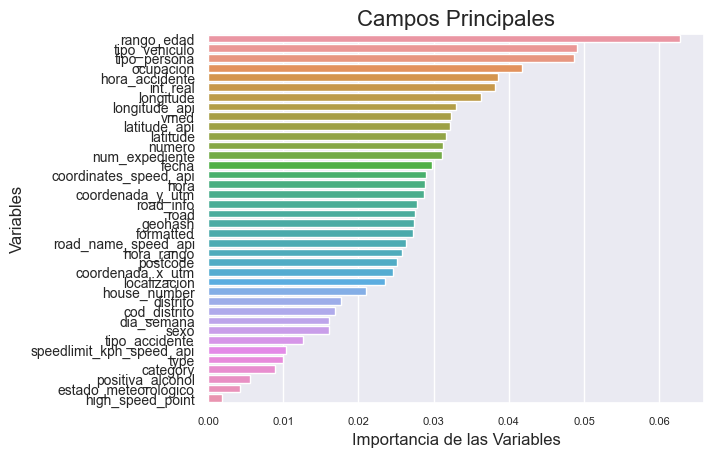

In [51]:
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.yticks(fontsize=10)
plt.xticks(fontsize=8)
plt.xlabel('Importancia de las Variables', fontsize=12)
plt.ylabel('Variables', fontsize=12)
plt.title("Campos Principales", fontsize=16)

plt.show()

En Base al % de importancia de los campos ajustamos el modelo. Nos quedamos con los que superen el 25%

In [52]:
df_ajuste=df_nuevo.drop(['flag_lesion','coordenada_y_utm','coordinates_speed_api','num_expediente','coordenada_x_utm','dia_semana','distrito','cod_distrito','house_number','speedlimit_kph_speed_api','type','category','estado_meteorológico','positiva_alcohol'], axis=1)

Normalizamos los datos

In [53]:
encoder = ce.OrdinalEncoder(cols=[	'fecha',	'hora','numero','localizacion', 'formatted',  'road_name_speed_api',
'tipo_accidente', 'tipo_vehiculo', 'tipo_persona', 'rango_edad', 'sexo',  'road_info', 'road', 'hora_accidente','geohash'])


df_ajuste= encoder.fit_transform(df_ajuste)

1º Estrategia: Aplicamos el UnderSampling para solucionar el problema que tenemos de Overfitting

In [54]:
#UnderSampling
fraudulent_ids = np.array(df_ajuste[df_ajuste.flag == 1].index)
NO_of_fraud_ids = len(fraudulent_ids)
print('No. of fradulent transactions in given data are:', NO_of_fraud_ids)

normal_ids = np.array(df_ajuste[df_ajuste.flag != 1].index)

random_normal_ids = np.random.choice(normal_ids, NO_of_fraud_ids, replace = False)
print('No. of normal transactions in given data are:', len(random_normal_ids))

under_sample_indices = np.concatenate([fraudulent_ids,random_normal_ids])
print('No. of indices in undersampled data are:', len(under_sample_indices))

under_sampled_data = df_ajuste.iloc[under_sample_indices, :]

Xx = under_sampled_data.iloc[:, under_sampled_data.columns != 'flag']
yy = under_sampled_data.iloc[:, under_sampled_data.columns == 'flag']

Xx_train, Xx_test, yy_train, yy_test = train_test_split(Xx, yy, test_size = 0.33, random_state = 42)

No. of fradulent transactions in given data are: 236
No. of normal transactions in given data are: 236
No. of indices in undersampled data are: 472


2º Estrategia, Probamos el Bagging Clasiffier. Pero vemos que no ajusta bien los campos no balanceados. Quitar lo comentado para hacer la prueba

In [55]:
#Prueba de  Bagging Classifier
#from imblearn.ensemble import BalancedBaggingClassifier
#from sklearn.tree import DecisionTreeClassifier

#Ensemble balanceado ( Bagging Classifier)


#Xx = df_ajuste.loc[:, df_ajuste.columns != 'flag'].values
#yy  = df_ajuste.loc[:, df_ajuste.columns == 'flag'].values

#Xx_train, Xx_test, yy_train, yy_test = train_test_split(Xx, yy, test_size = 0.33, random_state = 42)

#Create an object of the classifier.
#bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
 #                               sampling_strategy='auto',
  #                              replacement=False,
   #                             random_state=0)



#Train the classifier.
#bbc.fit(Xx_train, yy_train)

#Xx_train, Xx_test, yy_train, yy_test = train_test_split(Xx_train, yy_train,test_size=0.70, random_state=42)


3º Estrategia que vamos a probar es el NEARMISS  subsampling del grupo mayoritario

In [56]:
from imblearn.under_sampling import NearMiss

Xx = df_ajuste[df_ajuste.flag == 0]
Xx = df_ajuste.loc[:, df_ajuste.columns != 'flag']
yy = df_ajuste.loc[:, df_ajuste.columns == 'flag']

Xx_train, Xx_test, yy_train, yy_test = train_test_split(Xx, yy, test_size=0.33, random_state=42)

# Configura el método NearMiss con los parámetros apropiados
us = NearMiss(sampling_strategy=0.5, version=2, n_neighbors=3)

# Aplica el submuestreo a tus datos de entrenamiento
Xx_train, yy_train = us.fit_resample(Xx_train, yy_train)

# Realiza una nueva división de los datos de entrenamiento (si es necesario)
Xx_train, Xx_test, yy_train, yy_test = train_test_split(Xx_train, yy_train, test_size=0.70, random_state=42)


Dividimos el modelo quitando el campo de lesividad para predecirlo

In [57]:
# llamamos al Random Forest

rfc = RandomForestClassifier(n_estimators=100,random_state=0)

# Ajustamos el modelo

rfc.fit(Xx_train, yy_train)

# Predecir los resultados del conjunto de pruebas

y_pred = rfc.predict(Xx_test)

# Revisamos el  accuracy score

from sklearn.metrics import accuracy_score

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(yy_test, y_pred)))

Model accuracy score with 100 decision-trees : 0.9565


/var/folders/hw/skgky54j57nbjgb2lzttrgg40000gn/T/ipykernel_12849/4214379308.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(Xx_train, yy_train)


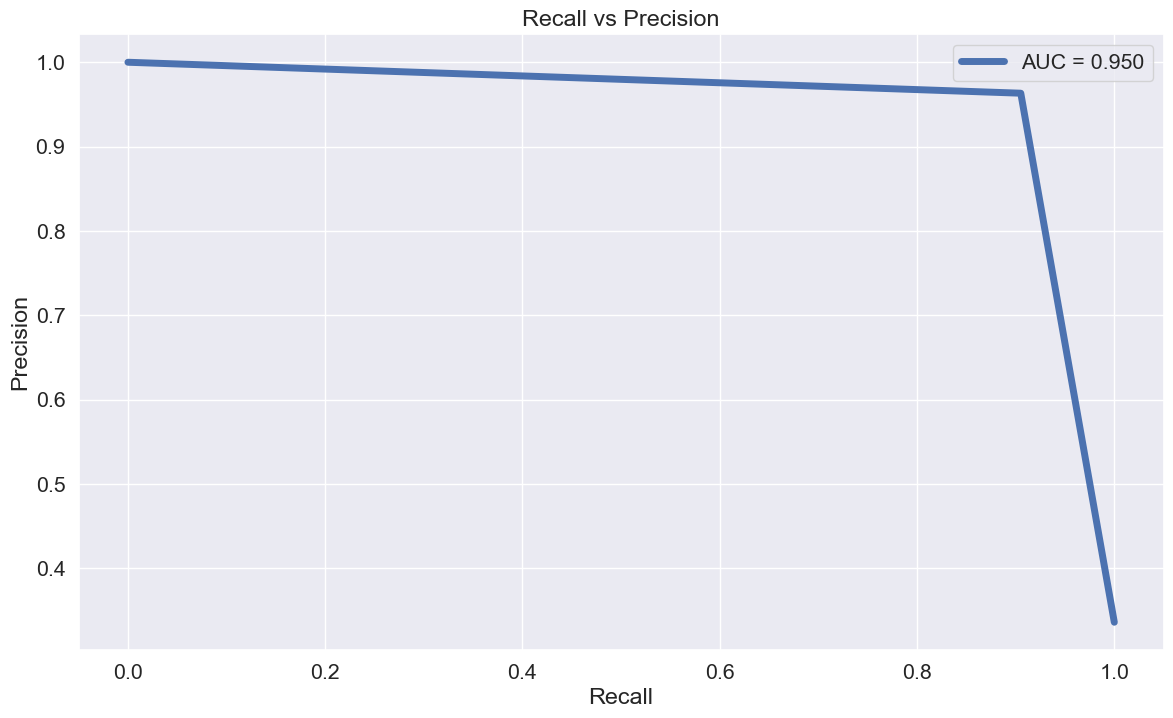

Accuracy score of LOF is:  0.9565217391304348
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       229
           1       0.96      0.91      0.93       116

    accuracy                           0.96       345
   macro avg       0.96      0.94      0.95       345
weighted avg       0.96      0.96      0.96       345

[[225   4]
 [ 11 105]]


<Axes: >

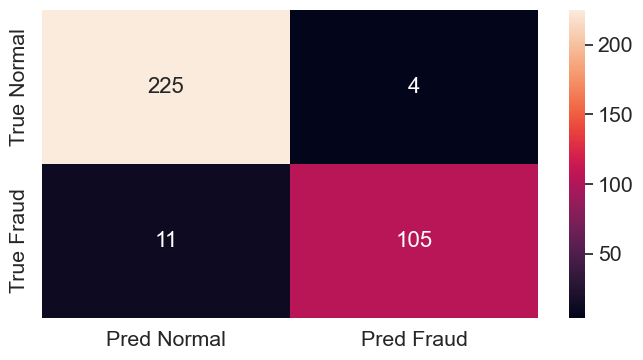

In [58]:
#Crear etiquetas de clase basadas en la función de decisión
osvm_y_pred_class=y_pred.copy()
osvm_y_pred_class[y_pred<0]=1
osvm_y_pred_class[y_pred>=0]=0


precision_rt, recall_rt, threshold_rt = precision_recall_curve(yy_test, y_pred)

pr_auc = auc(recall_rt, precision_rt,)

plt.figure(figsize=(14, 8))
plt.plot(recall_rt, precision_rt, linewidth=5, label='AUC = %0.3f'% pr_auc)
#plt.plot(recall_rt, threshold_rt, linewidth=5, label='Threshold')
plt.legend(loc='upper right')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

print("Accuracy score of LOF is: ", accuracy_score(yy_test, y_pred))
print(classification_report(yy_test, y_pred))
print(confusion_matrix(yy_test, y_pred))

roc_auc_score(yy_test, y_pred)

f1_score(yy_test,y_pred)

lof_cm=confusion_matrix(yy_test, y_pred)

df_cm = pd.DataFrame(lof_cm,
                  ['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])
plt.figure(figsize = (8,4))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size



In [59]:
# Creamos el Random Forrest con 100 arboles

clf2 = RandomForestClassifier(n_estimators=100, random_state=0)

# Ajustamos el modelo en training y test

clf2.fit(Xx_train, yy_train)

/var/folders/hw/skgky54j57nbjgb2lzttrgg40000gn/T/ipykernel_12849/3449845557.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf2.fit(Xx_train, yy_train)


RandomForestClassifier(random_state=0)

In [60]:
feature_scores_v2 = pd.Series(clf2.feature_importances_, index=Xx_train.columns).sort_values(ascending=False)


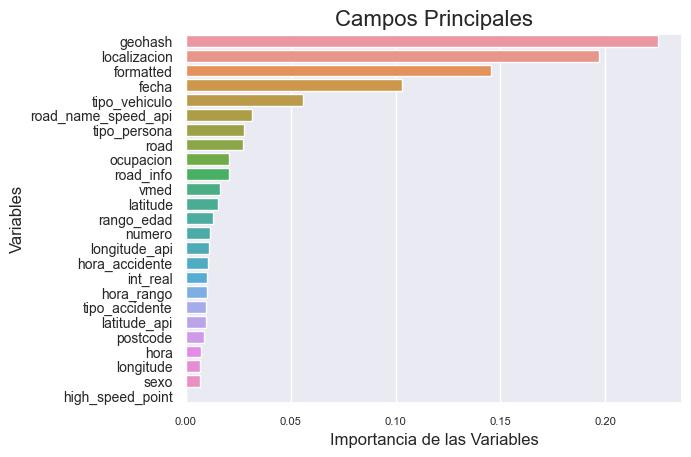

In [61]:
sns.barplot(x=feature_scores_v2, y=feature_scores_v2.index)
plt.yticks(fontsize=10)
plt.xticks(fontsize=8)
plt.xlabel('Importancia de las Variables', fontsize=12)
plt.ylabel('Variables', fontsize=12)
plt.title("Campos Principales", fontsize=16)

plt.show()

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
# Parametros a revisar en el random forest

criterion = ['gini', 'entropy']        # Criterio a considerar

n_estimators = [100, 200, 300]       # Número de arboles en el  random forest

max_features = ['auto', 'sqrt']       # Número de cantidades a considerar

In [64]:
max_depth = [10, 20]      # Número máximo de niveles en el árbol.

max_depth.append(None)

params = {'criterion': criterion,
          'n_estimators': n_estimators,
          'max_features': max_features,
          'max_depth': max_depth}

In [65]:
params

{'criterion': ['gini', 'entropy'],
 'n_estimators': [100, 200, 300],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, None]}

In [66]:
gs = GridSearchCV(rfc, param_grid=params, n_jobs=2)

In [67]:
gs.fit(Xx_train, yy_train)

/Users/john_mcclaine/mbit/mbit_venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/john_mcclaine/mbit/mbit_venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/john_mcclaine/mbit/mbit_venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/

GridSearchCV(estimator=RandomForestClassifier(random_state=0), n_jobs=2,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, None],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 200, 300]})

In [68]:
gs.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 100}

In [69]:
gs.best_score_

0.9662068965517241

In [70]:
gs.score(Xx_test, yy_test)

0.9565217391304348

In [71]:
y_pred = gs.predict(Xx_test)

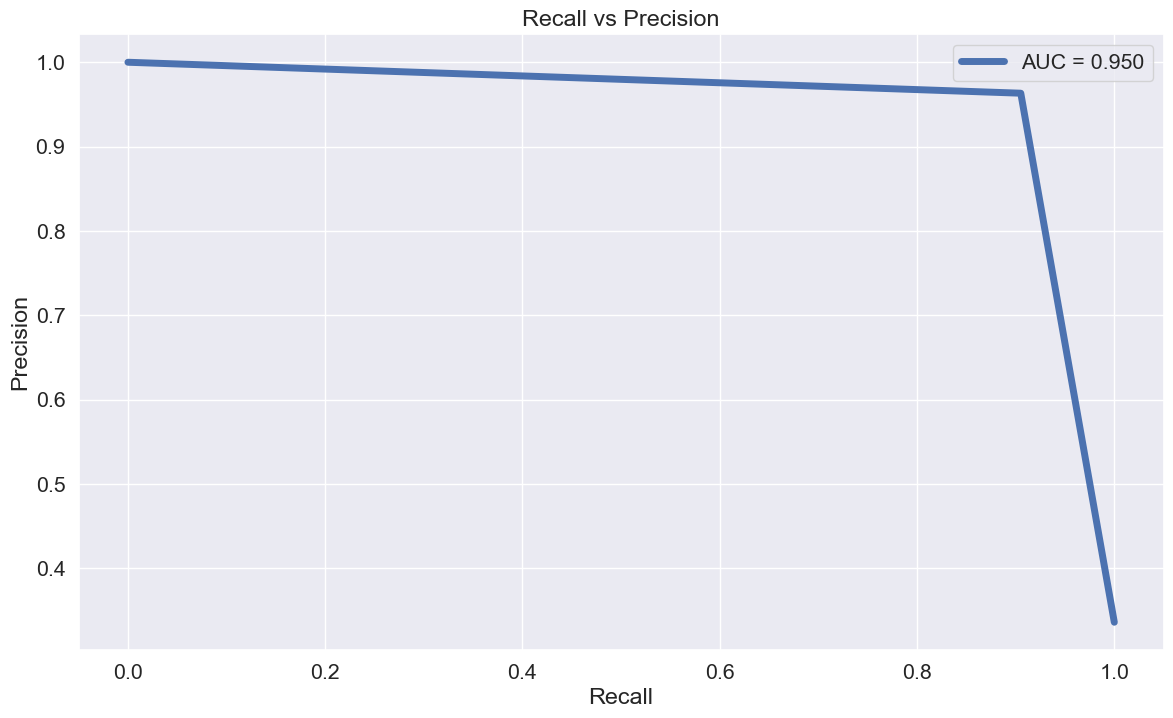

Accuracy score of LOF is:  0.9565217391304348
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       229
           1       0.96      0.91      0.93       116

    accuracy                           0.96       345
   macro avg       0.96      0.94      0.95       345
weighted avg       0.96      0.96      0.96       345

[[225   4]
 [ 11 105]]


<Axes: >

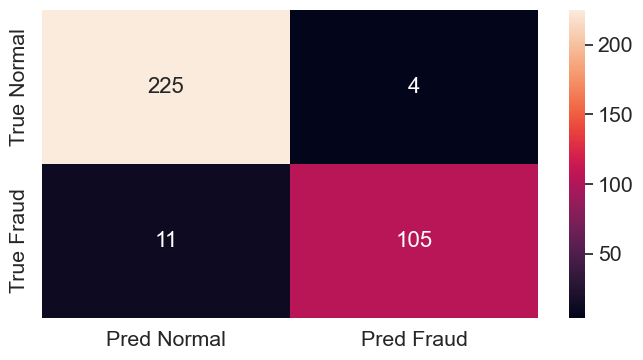

In [72]:
#Crear etiquetas de clase basadas en la función de decisión
osvm_y_pred_class=y_pred.copy()
osvm_y_pred_class[y_pred<0]=1
osvm_y_pred_class[y_pred>=0]=0


precision_rt, recall_rt, threshold_rt = precision_recall_curve(yy_test, y_pred)

pr_auc = auc(recall_rt, precision_rt,)

plt.figure(figsize=(14, 8))
plt.plot(recall_rt, precision_rt, linewidth=5, label='AUC = %0.3f'% pr_auc)
#plt.plot(recall_rt, threshold_rt, linewidth=5, label='Threshold')
plt.legend(loc='upper right')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

print("Accuracy score of LOF is: ", accuracy_score(yy_test, y_pred))
print(classification_report(yy_test, y_pred))
print(confusion_matrix(yy_test, y_pred))

roc_auc_score(yy_test, y_pred)

f1_score(yy_test,y_pred)

lof_cm=confusion_matrix(yy_test, y_pred)

df_cm = pd.DataFrame(lof_cm,
                  ['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])
plt.figure(figsize = (8,4))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size


2º MODELO RANDOM FORREST PREDICCIÓN LESIÓN LEVE

In [73]:
df_ajuste_2=df_nuevo.drop(['flag','coordenada_y_utm','coordinates_speed_api','num_expediente','coordenada_x_utm','dia_semana','distrito','cod_distrito','house_number','speedlimit_kph_speed_api','type','category','estado_meteorológico','positiva_alcohol'], axis=1)

Normalizamos datos a usar

In [74]:
encoder = ce.OrdinalEncoder(cols=[	'fecha',	'hora','numero','localizacion', 'formatted',  'road_name_speed_api',
'tipo_accidente', 'tipo_vehiculo', 'tipo_persona', 'rango_edad', 'sexo',  'road_info', 'road', 'hora_accidente','geohash'])


df_ajuste_2= encoder.fit_transform(df_ajuste_2)

Usamos la 3º Estrategia contra el Overfitting que dio Buenos resultados en Lesividad Grave

In [75]:


Xxx = df_ajuste_2[df_ajuste_2.flag_lesion == 0]
Xxx = df_ajuste_2.loc[:, df_ajuste_2.columns != 'flag_lesion']
yyy = df_ajuste_2.loc[:, df_ajuste_2.columns == 'flag_lesion']

Xxx_train, Xxx_test, yyy_train, yyy_test = train_test_split(Xxx, yyy, test_size=0.33, random_state=42)

# Configura el método NearMiss con los parámetros apropiados
uss = NearMiss(sampling_strategy=0.5, version=2, n_neighbors=3)

# Aplica el submuestreo a tus datos de entrenamiento
Xxx_train, yyy_train = uss.fit_resample(Xxx_train, yyy_train)

# Realiza una nueva división de los datos de entrenamiento
Xxx_train, Xxx_test, yyy_train, yyy_test = train_test_split(Xxx_train, yyy_train, test_size=0.70, random_state=42)

In [76]:
#UnderSampling
##fraudulent_ids = np.array(df_ajuste_2[df_ajuste_2.flag_lesion == 1].index)
#NO_of_fraud_ids = len(fraudulent_ids)
#print('No. of fradulent transactions in given data are:', NO_of_fraud_ids)

#normal_ids = np.array(df_ajuste_2[df_ajuste_2.flag_lesion != 1].index)

#random_normal_ids = np.random.choice(normal_ids, NO_of_fraud_ids, replace = False)
#print('No. of normal transactions in given data are:', len(random_normal_ids))

#under_sample_indices = np.concatenate([fraudulent_ids,random_normal_ids])
#print('No. of indices in undersampled data are:', len(under_sample_indices))

#under_sampled_data = df_ajuste_2.iloc[under_sample_indices, :]

#Xx = under_sampled_data.iloc[:, under_sampled_data.columns != 'flag_lesion']
#yy = under_sampled_data.iloc[:, under_sampled_data.columns == 'flag_lesion']

#Xxx_train, Xxx_test, yyy_train, yyy_test = train_test_split(Xx, yy, test_size = 0.33, random_state = 42)

In [77]:
# llamamos al Random Forest

rfc = RandomForestClassifier(n_estimators=100,random_state=0)

# Ajustamos el modelo

rfc.fit(Xxx_train, yyy_train)

# Predecir los resultados del conjunto de pruebas

yy_pred = rfc.predict(Xxx_test)

# Revisamos el  accuracy score

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(yyy_test, yy_pred)))

/var/folders/hw/skgky54j57nbjgb2lzttrgg40000gn/T/ipykernel_12849/164445024.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(Xxx_train, yyy_train)


Model accuracy score with 100 decision-trees : 0.8271


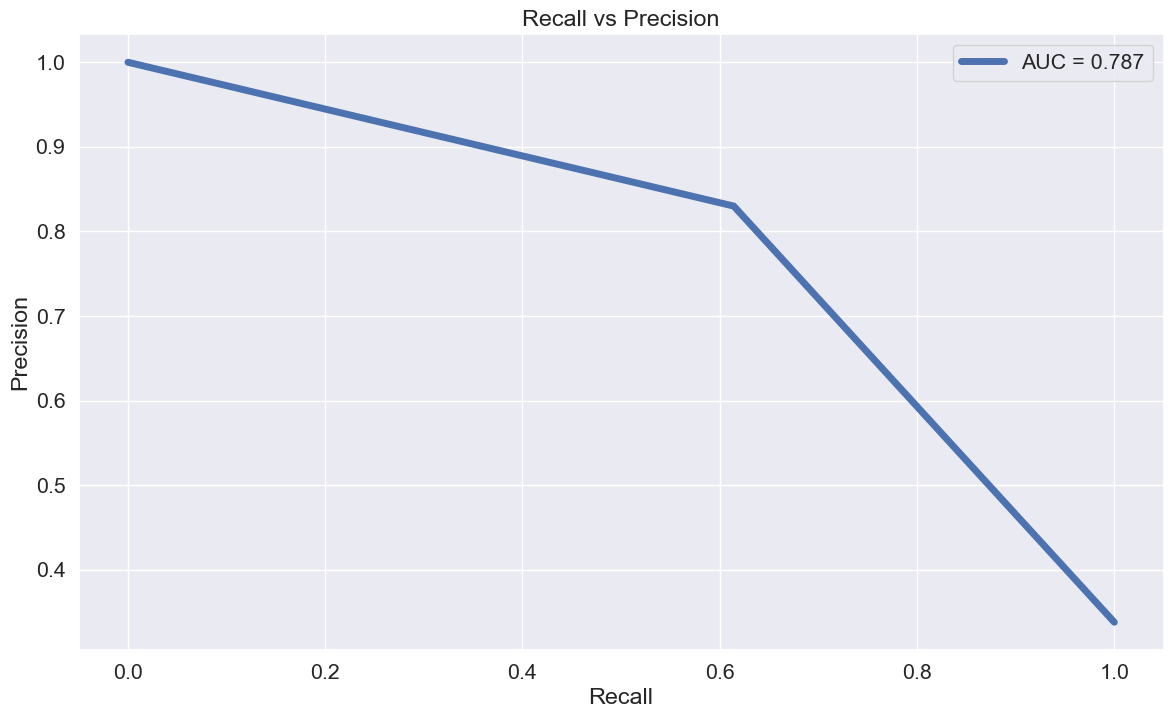

Accuracy score of LOF is:  0.8270550811987276
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      3954
           1       0.83      0.61      0.71      2019

    accuracy                           0.83      5973
   macro avg       0.83      0.77      0.79      5973
weighted avg       0.83      0.83      0.82      5973

[[3700  254]
 [ 779 1240]]


<Axes: >

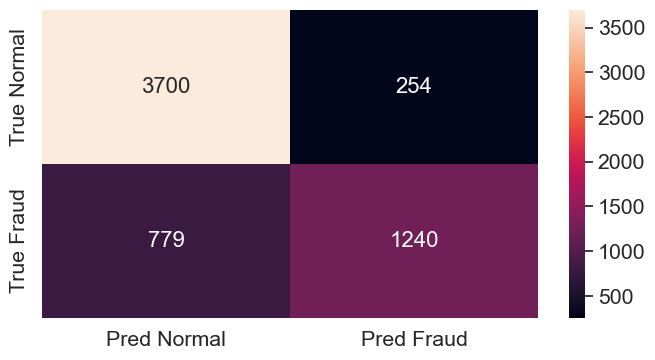

In [78]:
#Crear etiquetas de clase basadas en la función de decisión
osvm_yy_pred_class=yy_pred.copy()
osvm_yy_pred_class[yy_pred<0]=1
osvm_yy_pred_class[yy_pred>=0]=0


precision_rt, recall_rt, threshold_rt = precision_recall_curve(yyy_test, yy_pred)

pr_auc = auc(recall_rt, precision_rt,)

plt.figure(figsize=(14, 8))
plt.plot(recall_rt, precision_rt, linewidth=5, label='AUC = %0.3f'% pr_auc)
#plt.plot(recall_rt, threshold_rt, linewidth=5, label='Threshold')
plt.legend(loc='upper right')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

print("Accuracy score of LOF is: ", accuracy_score(yyy_test, yy_pred))
print(classification_report(yyy_test, yy_pred))
print(confusion_matrix(yyy_test, yy_pred))

roc_auc_score(yyy_test, yy_pred)

f1_score(yyy_test,yy_pred)

lof_cm=confusion_matrix(yyy_test, yy_pred)

df_cm = pd.DataFrame(lof_cm,
                  ['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])
plt.figure(figsize = (8,4))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

In [79]:
gss = GridSearchCV(rfc, param_grid=params, n_jobs=2)

In [80]:
gss.fit(Xxx_train, yyy_train)

/Users/john_mcclaine/mbit/mbit_venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/john_mcclaine/mbit/mbit_venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/john_mcclaine/mbit/mbit_venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/

GridSearchCV(estimator=RandomForestClassifier(random_state=0), n_jobs=2,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, None],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 200, 300]})

In [81]:
gss.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'auto',
 'n_estimators': 300}

In [82]:
gss.score(Xxx_test, yyy_test)

0.8330822032479491

In [83]:
gss.best_score_

0.8327528742661447

In [84]:
yy_pred = gs.predict(Xxx_test)

K MEANS

Aplicamos el The Elbow Method para ver el Optimo de Clusters

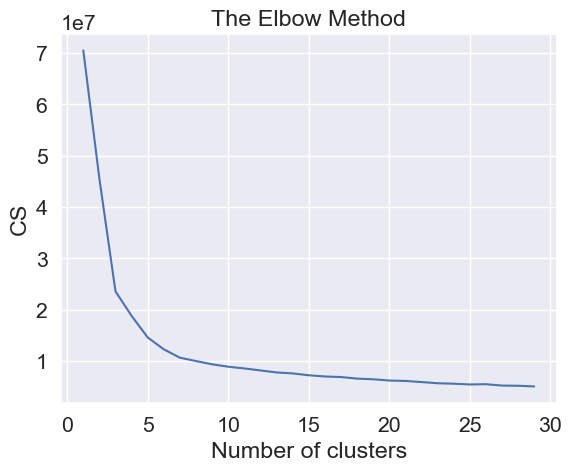

In [85]:
from sklearn.cluster import KMeans
under_sampled_data=encoder.fit_transform(under_sampled_data)
cs = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(under_sampled_data)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 30), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

Al no quedar claro cual es el Optimo de Clusters vamos aplicar el Silhouette Score. Donde te indica según que valor está más arriba cual es el cluster optimo

/Users/john_mcclaine/mbit/mbit_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/john_mcclaine/mbit/mbit_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/john_mcclaine/mbit/mbit_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/john_mcclaine/mbit/mbit_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppre

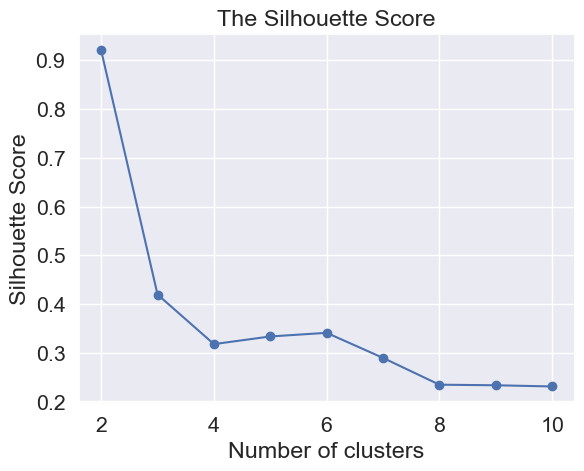

In [86]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Calculamos los silhouette_score para diferentes valores de k
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(under_sampled_data)
    score = silhouette_score(under_sampled_data, kmeans.labels_)

    silhouette_scores.append(score)

# Hacer una gráfica con el resultado
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('The Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [87]:

#kX = under_sampled_data[under_sampled_data.flag==0]
kX = df_ajuste_2.drop('flag_lesion',1)
ky = df_ajuste_2['flag_lesion']

X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(kX,ky,test_size = 0.2,random_state = 42,
                                                    stratify=ky)

/var/folders/hw/skgky54j57nbjgb2lzttrgg40000gn/T/ipykernel_12849/2128672129.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  kX = df_ajuste_2.drop('flag_lesion',1)


In [88]:
kmeans = KMeans(n_clusters=2, random_state=42).fit(X_train_k)

/Users/john_mcclaine/mbit/mbit_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [89]:
X_test_clusters=kmeans.predict(X_test_k)
X_test_clusters_centers=kmeans.cluster_centers_
dist = [np.linalg.norm(x-y) for x,y in zip(X_test_k.values,X_test_clusters_centers[X_test_clusters])]

km_y_pred=np.array(dist)
km_y_pred[dist>=np.percentile(dist,95)]=1
km_y_pred[dist<np.percentile(dist,95)]=0

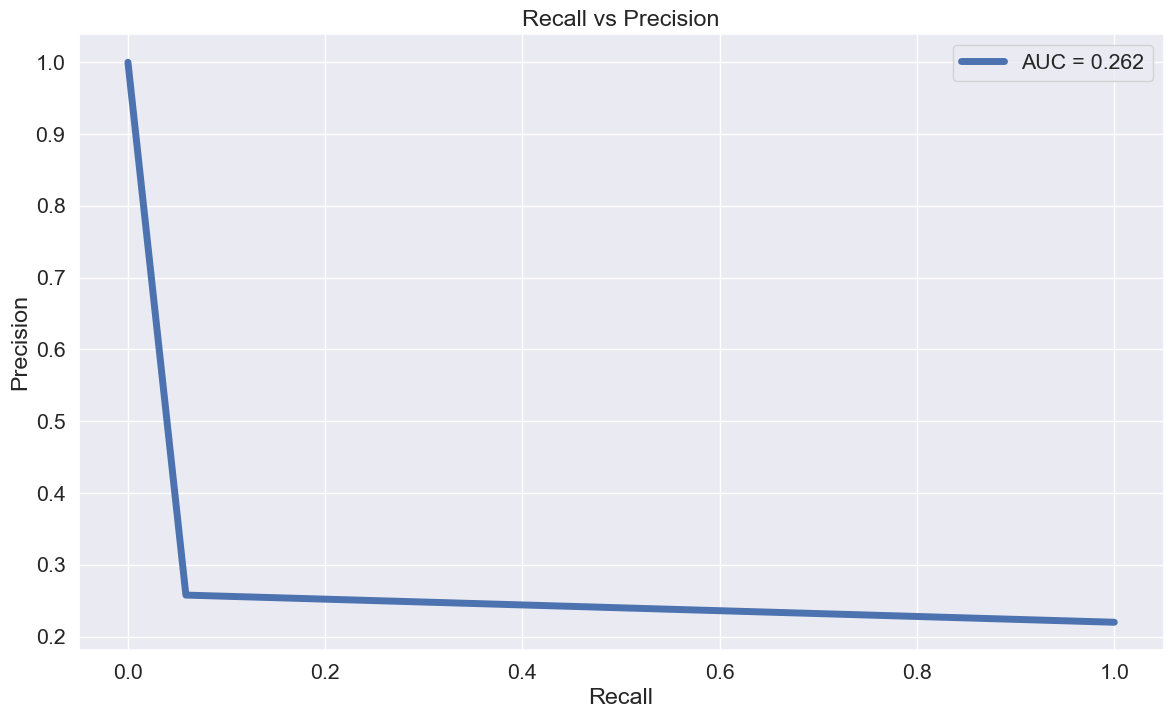

Accuracy score of LOF is:  0.7558139534883721
              precision    recall  f1-score   support

           0       0.78      0.95      0.86      3019
           1       0.26      0.06      0.10       851

    accuracy                           0.76      3870
   macro avg       0.52      0.51      0.48      3870
weighted avg       0.67      0.76      0.69      3870

[[2875  144]
 [ 801   50]]


<Axes: >

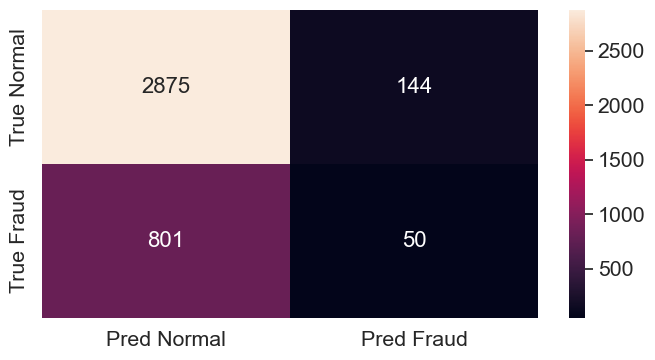

In [90]:
precision_rt, recall_rt, threshold_rt = precision_recall_curve(y_test_k, km_y_pred)

pr_auc = auc(recall_rt, precision_rt,)

plt.figure(figsize=(14, 8))
plt.plot(recall_rt, precision_rt, linewidth=5, label='AUC = %0.3f'% pr_auc)
#plt.plot(recall_rt, threshold_rt, linewidth=5, label='Threshold')
plt.legend(loc='upper right')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

print("Accuracy score of LOF is: ", accuracy_score(y_test_k, km_y_pred))
print(classification_report(y_test_k, km_y_pred))
print(confusion_matrix(y_test_k, km_y_pred))

roc_auc_score(y_test_k, km_y_pred)

f1_score(y_test_k,km_y_pred)

lof_cm=confusion_matrix(y_test_k, km_y_pred)

df_cm = pd.DataFrame(lof_cm,
                  ['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])
plt.figure(figsize = (8,4))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

In [91]:
roc_auc_score(y_test_k, km_y_pred)

0.5055282466820983

In [92]:
  f1_score(y_test_k, km_y_pred)

0.09569377990430622

In [93]:
km_cm=confusion_matrix(y_test_k, km_y_pred)

3º MODELO DECISSION TREE PREDICTION LESIÓN GRAVE

In [94]:
# import DecisionTreeClassifier

# Aplicamos el criterio gini para el decision tree

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# Ajustamos modelo
clf_gini.fit(Xx_train, yy_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [95]:
y_pred_gini = clf_gini.predict(Xx_test)

In [96]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(yy_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9478


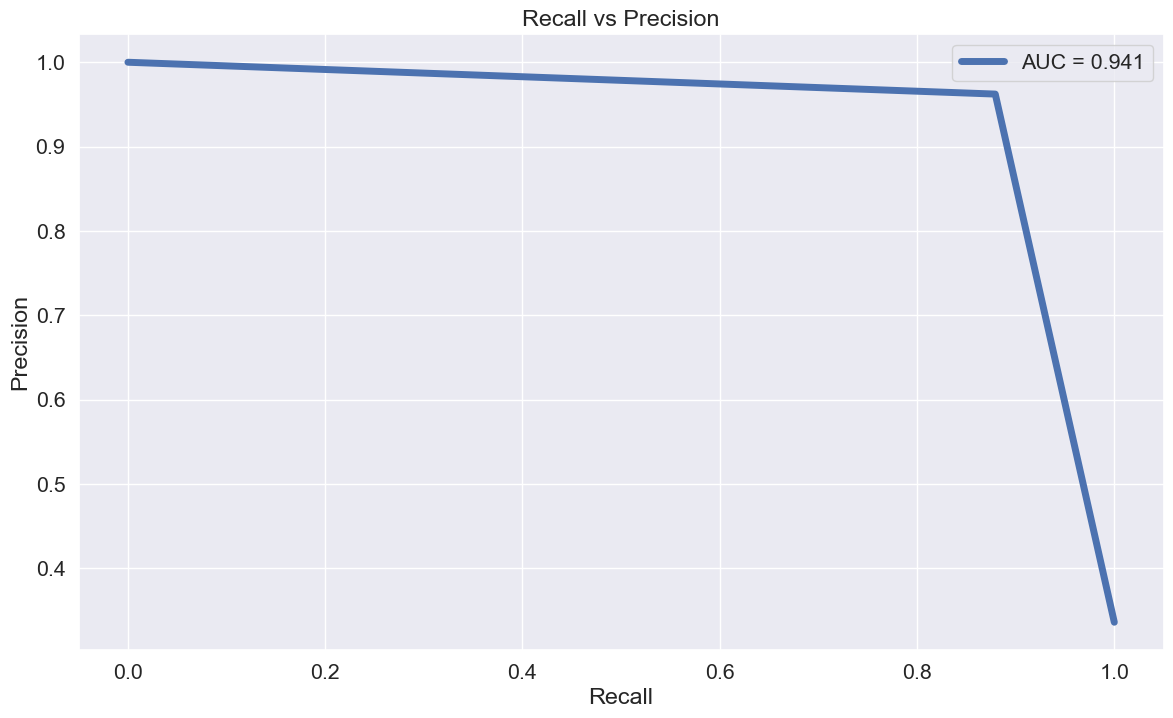

Accuracy score of LOF is:  0.9478260869565217
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       229
           1       0.96      0.88      0.92       116

    accuracy                           0.95       345
   macro avg       0.95      0.93      0.94       345
weighted avg       0.95      0.95      0.95       345

[[225   4]
 [ 14 102]]


<Axes: >

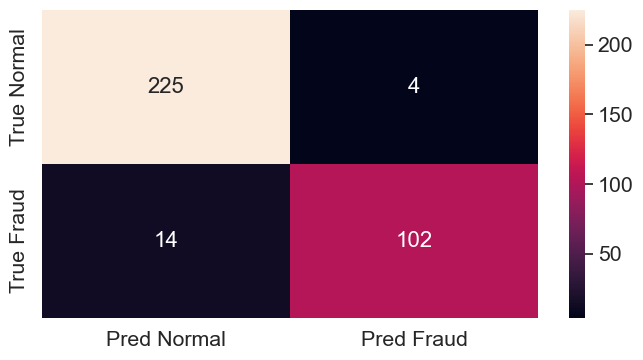

In [97]:
precision_rt, recall_rt, threshold_rt = precision_recall_curve(yy_test, y_pred_gini)

pr_auc = auc(recall_rt, precision_rt,)

plt.figure(figsize=(14, 8))
plt.plot(recall_rt, precision_rt, linewidth=5, label='AUC = %0.3f'% pr_auc)
#plt.plot(recall_rt, threshold_rt, linewidth=5, label='Threshold')
plt.legend(loc='upper right')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

print("Accuracy score of LOF is: ", accuracy_score(yy_test, y_pred_gini))
print(classification_report(yy_test, y_pred_gini))
print(confusion_matrix(yy_test, y_pred_gini))

roc_auc_score(yy_test, y_pred_gini)

f1_score(yy_test,y_pred_gini)

lof_cm=confusion_matrix(yy_test, y_pred_gini)

df_cm = pd.DataFrame(lof_cm,
                  ['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])
plt.figure(figsize = (8,4))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

[Text(0.6, 0.875, 'x[11] <= 4191.5\ngini = 0.44\nsamples = 147\nvalue = [99, 48]'),
 Text(0.4, 0.625, 'x[11] <= 3203.5\ngini = 0.314\nsamples = 123\nvalue = [99, 24]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 20\nvalue = [0, 20]'),
 Text(0.6, 0.375, 'x[21] <= 17.037\ngini = 0.075\nsamples = 103\nvalue = [99, 4]'),
 Text(0.4, 0.125, 'gini = 0.057\nsamples = 102\nvalue = [99, 3]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 24\nvalue = [0, 24]')]

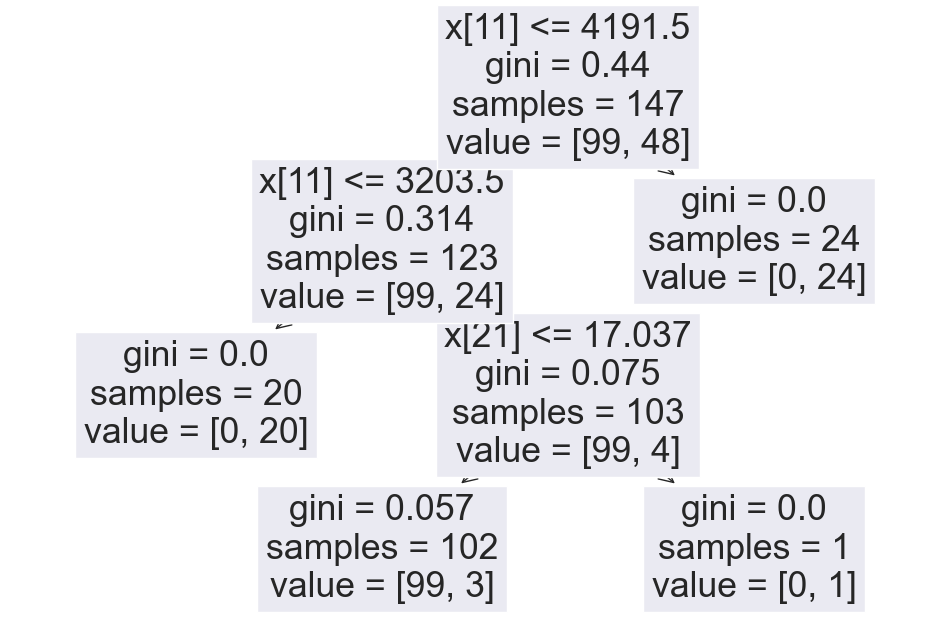

In [98]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(Xx_train, yy_train))

3º MODELO DECISSION TREE PREDICTION LESIÓN LEVE

In [99]:
# Aplicamoe elcriterio gini index en el modelo

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# Ajustamos el modelo
clf_gini.fit(Xxx_train, yyy_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [100]:
yy_pred_gini = clf_gini.predict(Xxx_test)

In [101]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(yyy_test, yy_pred_gini)))

Model accuracy score with criterion gini index: 0.7932


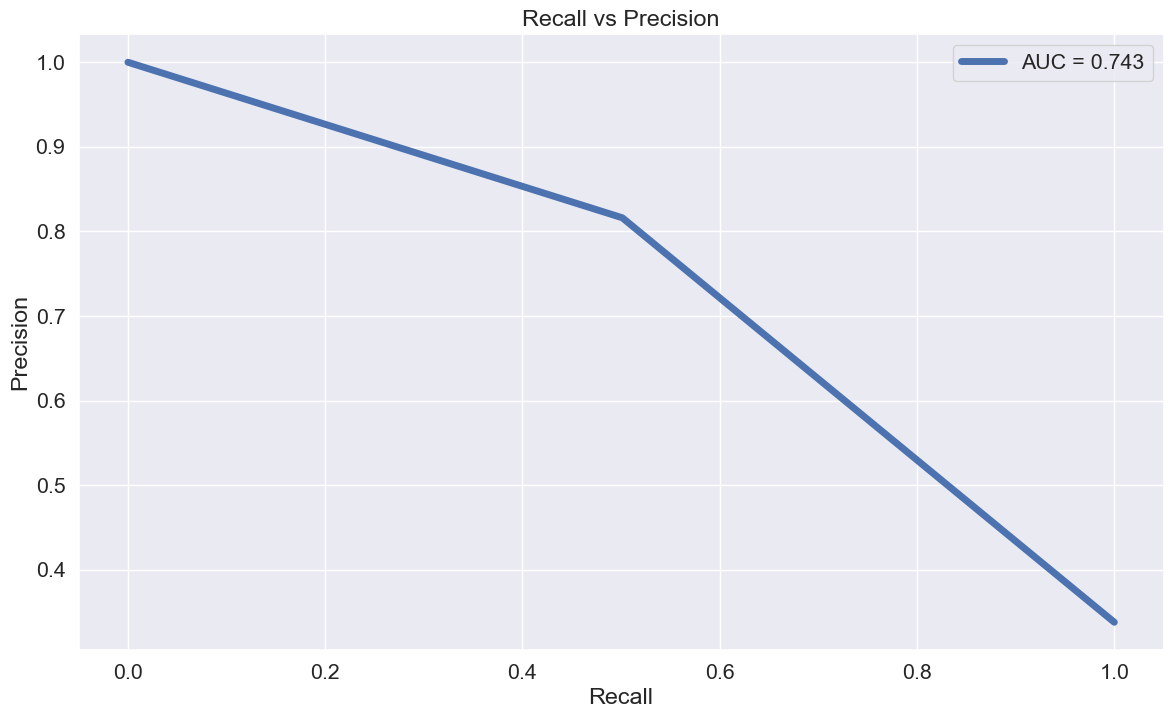

Accuracy score of LOF is:  0.7932362297003182
              precision    recall  f1-score   support

           0       0.79      0.94      0.86      3954
           1       0.82      0.50      0.62      2019

    accuracy                           0.79      5973
   macro avg       0.80      0.72      0.74      5973
weighted avg       0.80      0.79      0.78      5973

[[3726  228]
 [1007 1012]]


<Axes: >

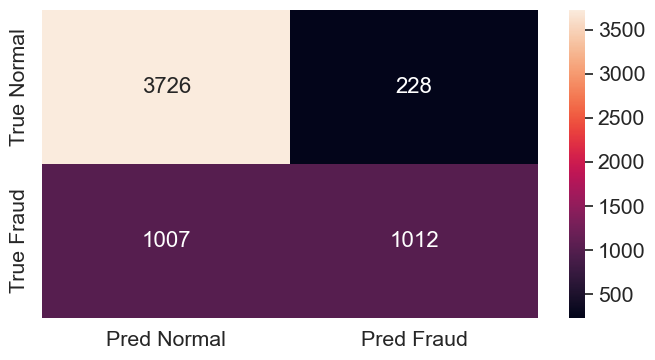

In [102]:
precision_rt, recall_rt, threshold_rt = precision_recall_curve(yyy_test, yy_pred_gini)

pr_auc = auc(recall_rt, precision_rt,)

plt.figure(figsize=(14, 8))
plt.plot(recall_rt, precision_rt, linewidth=5, label='AUC = %0.3f'% pr_auc)
#plt.plot(recall_rt, threshold_rt, linewidth=5, label='Threshold')
plt.legend(loc='upper right')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

print("Accuracy score of LOF is: ", accuracy_score(yyy_test, yy_pred_gini))
print(classification_report(yyy_test, yy_pred_gini))
print(confusion_matrix(yyy_test, yy_pred_gini))

roc_auc_score(yyy_test, yy_pred_gini)

f1_score(yyy_test,yy_pred_gini)

lof_cm=confusion_matrix(yyy_test, yy_pred_gini)

df_cm = pd.DataFrame(lof_cm,
                  ['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])
plt.figure(figsize = (8,4))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

[Text(0.4230769230769231, 0.875, 'x[11] <= 1577.0\ngini = 0.437\nsamples = 2559\nvalue = [1734, 825]'),
 Text(0.15384615384615385, 0.625, 'x[2] <= 2037.5\ngini = 0.256\nsamples = 252\nvalue = [38, 214]'),
 Text(0.07692307692307693, 0.375, 'gini = 0.0\nsamples = 182\nvalue = [0, 182]'),
 Text(0.23076923076923078, 0.375, 'x[5] <= 2.5\ngini = 0.496\nsamples = 70\nvalue = [38, 32]'),
 Text(0.15384615384615385, 0.125, 'gini = 0.346\nsamples = 45\nvalue = [35, 10]'),
 Text(0.3076923076923077, 0.125, 'gini = 0.211\nsamples = 25\nvalue = [3, 22]'),
 Text(0.6923076923076923, 0.625, 'x[15] <= 4489.0\ngini = 0.389\nsamples = 2307\nvalue = [1696, 611]'),
 Text(0.5384615384615384, 0.375, 'x[5] <= 7.5\ngini = 0.357\nsamples = 2179\nvalue = [1673, 506]'),
 Text(0.46153846153846156, 0.125, 'gini = 0.311\nsamples = 1959\nvalue = [1581, 378]'),
 Text(0.6153846153846154, 0.125, 'gini = 0.487\nsamples = 220\nvalue = [92, 128]'),
 Text(0.8461538461538461, 0.375, 'x[2] <= 5788.5\ngini = 0.295\nsamples = 128

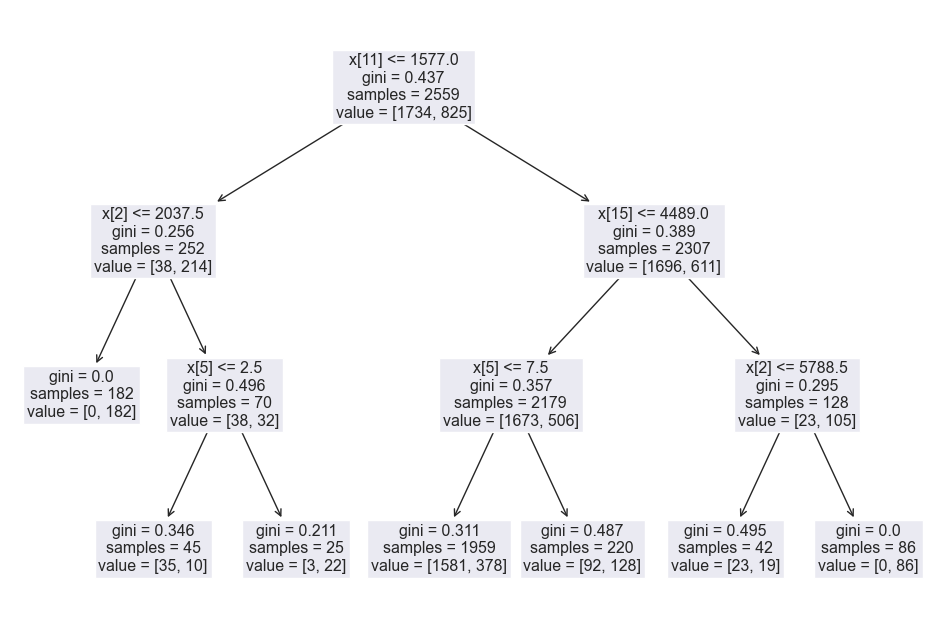

In [103]:
plt.figure(figsize=(12,8))

tree.plot_tree(clf_gini.fit(Xxx_train, yyy_train))

Viendo estos resultados. Para la aplicación usaremos El Random Forest Classifier tanto para la Predicción de Lesividad Grave como Lesividad Leve

Procederemos a Guardar las predicciones en la base inicial y dejarlo en un CSV

In [104]:
Xx_test['pred_lesividad_grave'] = y_pred

Xxx_test['pred_lesividad_leve'] = yy_pred

# Mapear las predicciones de Xx_test a df_ajuste utilizando el índice
df_ajuste['pred_lesividad_grave'] = Xx_test['pred_lesividad_grave']

#df_ajuste['pred_lesividad_leve'] = Xxx_test['pred_lesividad_leve']
# Guardar el DataFrame actualizado con las predicciones
df_ajuste.to_csv('../Files/2023_Accidentalidad_predicciones.csv', index=False)